# Telecom Churn Case Study

## Problem Statement

#### The telecommunications industry experiences an average of 15-25% annual churn rate, due to highly competitive market. Customer retention has now become even more important than customer acquisition, as it costs 5-10 times more to acquire a new customer than to retain an existing one.
#### To reduce customer churn, telecom companies need to predict which high profitable customers are at high risk of churn. Also, want to identify strong indicators of churn, that may help them understand why customers choose to switch to other networks.

### Business Goal

#### 1. To predict the churn for the high-value customers in the last month using the data from the first three months.
#### 2. To identify important variables that are strong predictors of churn. 

## Approach

#### Pre-processing
1. Data understanding 
2. Data cleaning
3. Data preparation 

#### For prediction: 
4. Apply PCA to reduce dimensionality
5. Model building 
6. Comparison of evaluation metrics for various models built
7. Final model for prediction

#### For identifying important predictor attributes
8. Model Building - data without PCA
9. Comparison of evaluation metrics for various models built
10. Important featires identified

## 1. Data understanding

In [4]:
# lets import the libraries needed to start off with

#suppressing warning 
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE


In [5]:
#reading the telecom data provided

df = pd.read_csv('C:/Users/meena/Documents/Machine Learning 2/Telecom Churn case study/telecom_churn_data.csv')
df.shape

(99999, 226)

In [6]:
pd.set_option('display.max_columns', None)

df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
#Lets check if there are duplicate customer id

df['mobile_number'].nunique()

99999

All unique customer ids, no duplicates present

We need to work with data for high-value customers only. So, we will first filter out the data for high-value customers and then go with data cleaning. 

High-value customer is defined as the customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months

The columns we need to identify high-value customers:
1. total_rech_amt_6
2. total_rech_amt_7

Lets see if there is any null value in these two columns. 

In [8]:
# lets check if total_rech_amt_6 has any missing value

df['total_rech_amt_6'].isnull().sum()

0

In [9]:
# lets check if total_rech_amt_7 has any missing value

df['total_rech_amt_7'].isnull().sum()

0

In [10]:
#Lets derive a new column with average of the columns 'total_rech_amt_6' and 'total_rech_amt_7'

df['av_rech_amt_6_7'] = round((df['total_rech_amt_6']+df['total_rech_amt_7'])/2, 2)
df['av_rech_amt_6_7'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: av_rech_amt_6_7, dtype: float64

In [11]:
#Lets see the value at 70th percentile of the average recharge column that we just derived

df['av_rech_amt_6_7'].quantile(0.7)

368.5

In [12]:
#Lets filter the data above 70 percentile and take them to master file

master_df = df[df['av_rech_amt_6_7'] >= df['av_rech_amt_6_7'].quantile(0.7)]
master_df.shape

(30011, 227)

In [13]:
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,1

Now we have filtered out high-value customer. Here on, we will be working on master_df file. 
Lets try to understand data in column by column. 

In [14]:
#Defining function for dropping columns

def drop_funct(drop_cols):
    master_df.drop(drop_cols, axis=1, inplace=True)

In [15]:
#checking unique values in circle_id

master_df['circle_id'].value_counts()

109    30011
Name: circle_id, dtype: int64

In [16]:
#Since all data belong to same circle id, this column is not significant. We will drop this column.

#dropping circle_id
drop_cols_1 = ['circle_id']
drop_funct(drop_cols_1)

In [17]:
#lets look at the data distribution in numeric column

master_df.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7
count,3.001100e+04,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.0,29708.0,29073.0,28307.0,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.0

In [18]:
#Some of the columns have only 0s or blanks. Lets drop such column.

#Selecting such columns by equating mean to 0
drop_cols_2 = (master_df.mean()[master_df.mean() == 0]).index
drop_cols_2

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [19]:
drop_funct(drop_cols_2)
master_df.shape

(30011, 215)

In [20]:
#Columns last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 do not have much significance. 
#They give the last date of each of the four months. So, we will drop these as well.

drop_cols_3 = ['last_date_of_month_6', 'last_date_of_month_7', 
             'last_date_of_month_8', 'last_date_of_month_9']
drop_funct(drop_cols_3)
master_df.shape

(30011, 211)

If we observe data, some columns are derivation of other, and hence repeat of the inofrmation. Lets identify such columns and we can get rid of some repeated ones.

loc_og_mou_* = loc_og_t2t_mou_* + loc_og_t2m_mou_* + loc_og_t2f_mou_*

So, we can drop loc_og_t2t_mou_*, loc_og_t2m_mou_*, loc_og_t2f_mou_*

Similarly, for std:
std_og_mou_* = std_og_t2t_mou_* + std_og_t2f_mou_* + std_og_t2m_mou_*

So, we can drop std_og_t2t_mou_*, std_og_t2f_mou_*, std_og_t2m_mou_*


Similar summation is happening for incoming calls. So, we can drop loc_ic_t2t_mou_*, loc_ic_t2m_mou_*, loc_ic_t2f_mou_*, std_ic_t2t_mou_*, std_ic_t2m_mou_*, std_ic_t2f_mou_*

also, we have already derived a new column from 'total_rech_amt_6' and 'total_rech_amt_7'. So we will drop these 2 as well. 

In [21]:
drop_cols_4 = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
              'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
              'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
              'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9',
              'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
              'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
              'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
              'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
              'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9',
              'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9',
              'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
              'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',
              'total_rech_amt_6', 'total_rech_amt_7']
drop_funct(drop_cols_4)
master_df.shape

(30011, 161)

In this section, we got a high-level understanding of data. Also, got rid of redundant columns. 

## 2. Data Cleaning

In [22]:
#Lets check the missing value percentage in each column

round(master_df[master_df.columns[master_df.isnull().mean() > 0]].isnull().mean() * 100, 2)


onnet_mou_6          1.05
onnet_mou_7          1.01
onnet_mou_8          3.13
onnet_mou_9          5.68
offnet_mou_6         1.05
                    ...  
night_pck_user_9    61.81
fb_user_6           62.02
fb_user_7           61.14
fb_user_8           60.83
fb_user_9           61.81
Length: 104, dtype: float64

We see several columns with high percentage of missing values, more than 60%. 
If we look at the columns, mostly they are related to either mobile internet package/special night package/social media package. 
These are special package which are generally not availed commonly by many customers. That can be the reason for so many missing values in those columns.


In [23]:
#Lets look at columns with more than 60% missing values and try to impute them

cols_list = list(master_df[master_df.columns[master_df.isnull().mean() > 0.6]].columns)
master_df[cols_list].head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7/31/2014,8/23/2014,NaN,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN,NaN,2.0,3.0,NaN,NaN,0.0,0.0,NaN,NaN,177.0,69.0,NaN,NaN,0.0,19.83,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
13,NaN,NaN,8/30/2014,NaN,NaN,NaN,3.0,NaN,NaN,NaN,23.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,69.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Lets look at the dtype of columns

master_df[cols_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_data_6  11397 non-null  object 
 1   date_of_last_rech_data_7  11662 non-null  object 
 2   date_of_last_rech_data_8  11754 non-null  object 
 3   date_of_last_rech_data_9  11461 non-null  object 
 4   total_rech_data_6         11397 non-null  float64
 5   total_rech_data_7         11662 non-null  float64
 6   total_rech_data_8         11754 non-null  float64
 7   total_rech_data_9         11461 non-null  float64
 8   max_rech_data_6           11397 non-null  float64
 9   max_rech_data_7           11662 non-null  float64
 10  max_rech_data_8           11754 non-null  float64
 11  max_rech_data_9           11461 non-null  float64
 12  count_rech_2g_6           11397 non-null  float64
 13  count_rech_2g_7           11662 non-null  float64
 14  count_

If we notice the number of missing values in the above columns, we can see all columns for 6th month have 11397 non-null values, 7th month have 11662 non-null missing values, and so on. 
This clearly indicates that the values are missing because the customer did not recharge for data. Its not data error. 
We will replace missing values with 0 in all the float columns. 

For date columns, we will extract day part, as it signifies which day of the month recharge was done. Month and year are anyways the same in each column. For missing dates, we will impute 0 as the day of recharge. 

In [25]:
#coverting datatype for the date columns 

master_df['date_of_last_rech_data_6'] = pd.to_datetime(master_df['date_of_last_rech_data_6'])
master_df['date_of_last_rech_data_7'] = pd.to_datetime(master_df['date_of_last_rech_data_7'])
master_df['date_of_last_rech_data_8'] = pd.to_datetime(master_df['date_of_last_rech_data_8'])
master_df['date_of_last_rech_data_9'] = pd.to_datetime(master_df['date_of_last_rech_data_9'])

In [26]:
#looking at the columns after conversion

master_df[['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
           'date_of_last_rech_data_8', 'date_of_last_rech_data_9']].head(20)

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
7,NaT,NaT,NaT,NaT
8,NaT,2014-07-31,2014-08-23,NaT
13,NaT,NaT,2014-08-30,NaT
16,NaT,NaT,NaT,NaT
17,NaT,NaT,NaT,NaT
21,NaT,NaT,NaT,NaT
24,NaT,NaT,NaT,NaT
33,2014-06-30,2014-07-28,2014-08-26,2014-09-10
38,NaT,NaT,NaT,2014-09-26
41,NaT,NaT,NaT,NaT


In [27]:
#Extracting day from the date columns

master_df['day_of_last_rech_data_6'] = pd.to_datetime(master_df['date_of_last_rech_data_6']).dt.day
master_df['day_of_last_rech_data_7'] = pd.to_datetime(master_df['date_of_last_rech_data_7']).dt.day
master_df['day_of_last_rech_data_8'] = pd.to_datetime(master_df['date_of_last_rech_data_8']).dt.day
master_df['day_of_last_rech_data_9'] = pd.to_datetime(master_df['date_of_last_rech_data_9']).dt.day

#filling NA values with 0
master_df['day_of_last_rech_data_6'] = master_df['day_of_last_rech_data_6'].fillna(0).astype('int')
master_df['day_of_last_rech_data_7'] = master_df['day_of_last_rech_data_7'].fillna(0).astype('int')
master_df['day_of_last_rech_data_8'] = master_df['day_of_last_rech_data_8'].fillna(0).astype('int')
master_df['day_of_last_rech_data_9'] = master_df['day_of_last_rech_data_9'].fillna(0).astype('int')

master_df[['day_of_last_rech_data_6', 'day_of_last_rech_data_7', 'day_of_last_rech_data_8', 'day_of_last_rech_data_9']].head(20)

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,day_of_last_rech_data_9
7,0,0,0,0
8,0,31,23,0
13,0,0,30,0
16,0,0,0,0
17,0,0,0,0
21,0,0,0,0
24,0,0,0,0
33,30,28,26,10
38,0,0,0,26
41,0,0,0,0


In [28]:
#We will now drop the original date columns

drop_cols_5= ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
drop_funct(drop_cols_5)

In [29]:
#Lets look at the null values again, in data recharge related columns

cols_list = list(master_df[master_df.columns[master_df.isnull().mean() > 0.6]].columns)
master_df[cols_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_6   11397 non-null  float64
 1   total_rech_data_7   11662 non-null  float64
 2   total_rech_data_8   11754 non-null  float64
 3   total_rech_data_9   11461 non-null  float64
 4   max_rech_data_6     11397 non-null  float64
 5   max_rech_data_7     11662 non-null  float64
 6   max_rech_data_8     11754 non-null  float64
 7   max_rech_data_9     11461 non-null  float64
 8   count_rech_2g_6     11397 non-null  float64
 9   count_rech_2g_7     11662 non-null  float64
 10  count_rech_2g_8     11754 non-null  float64
 11  count_rech_2g_9     11461 non-null  float64
 12  count_rech_3g_6     11397 non-null  float64
 13  count_rech_3g_7     11662 non-null  float64
 14  count_rech_3g_8     11754 non-null  float64
 15  count_rech_3g_9     11461 non-null  float64
 16  av_r

In [30]:
#We have taken care of date columns. Now we will now impute null values in these columns as 0

master_df[cols_list] = master_df[cols_list].fillna(0)
master_df[cols_list].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
arpu_3g_6             0
arpu_3g_7             0
arpu_3g_8             0
arpu_3g_9             0
arpu_2g_6             0
arpu_2g_7             0
arpu_2g_8             0
arpu_2g_9             0
night_pck_user_6      0
night_pck_user_7      0
night_pck_user_8      0
night_pck_user_9      0
fb_user_6             0
fb_user_7             0
fb_user_8             0
fb_user_9             0
dtype: int64

In [31]:
master_df[cols_list].head(20)

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,0.00,0.00,19.83,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13,0.0,0.0,3.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,5.0,8.0,1.0,2.0,252.0,1255.0,455.0,655.0,0.0,0.0,0.0,0.0,5.0,8.0,1.0,2.0,1057.0,2553.0,455.0,907.0,897.60,2294.03,405.26,764.28,931.58,2200.20,391.92,771.39,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
38,0.0,0.0,0.0,3.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Lets check null values in the master dataframe once again

round(master_df[master_df.columns[master_df.isnull().mean() > 0]].isnull().mean() * 100, 2)


onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
onnet_mou_9            5.68
offnet_mou_6           1.05
                       ... 
ic_others_9            5.68
date_of_last_rech_6    0.21
date_of_last_rech_7    0.38
date_of_last_rech_8    1.98
date_of_last_rech_9    2.89
Length: 64, dtype: float64

In the above columns, we will impute the missing values.

The date columns above will be handled the same way as we did for the other date columns, i.e. we will extract day part, as it signifies which day of the month recharge was done. For missing dates, we will impute 0 as the day of recharge.

In [33]:
#coverting datatype for the date columns 

master_df['date_of_last_rech_6'] = pd.to_datetime(master_df['date_of_last_rech_6'])
master_df['date_of_last_rech_7'] = pd.to_datetime(master_df['date_of_last_rech_7'])
master_df['date_of_last_rech_8'] = pd.to_datetime(master_df['date_of_last_rech_8'])
master_df['date_of_last_rech_9'] = pd.to_datetime(master_df['date_of_last_rech_9'])

In [34]:
#Extracting day from the date columns

master_df['day_of_last_rech_6'] = pd.to_datetime(master_df['date_of_last_rech_6']).dt.day
master_df['day_of_last_rech_7'] = pd.to_datetime(master_df['date_of_last_rech_7']).dt.day
master_df['day_of_last_rech_8'] = pd.to_datetime(master_df['date_of_last_rech_8']).dt.day
master_df['day_of_last_rech_9'] = pd.to_datetime(master_df['date_of_last_rech_9']).dt.day

#filling NA values with 0
master_df['day_of_last_rech_6'] = master_df['day_of_last_rech_6'].fillna(0).astype('int')
master_df['day_of_last_rech_7'] = master_df['day_of_last_rech_7'].fillna(0).astype('int')
master_df['day_of_last_rech_8'] = master_df['day_of_last_rech_8'].fillna(0).astype('int')
master_df['day_of_last_rech_9'] = master_df['day_of_last_rech_9'].fillna(0).astype('int')

master_df[['day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8', 'day_of_last_rech_9']].head(10)

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_9
7,27,25,26,30
8,25,31,30,30
13,20,22,30,26
16,30,31,14,10
17,30,30,25,29
21,30,31,31,30
24,23,17,31,29
33,30,30,26,28
38,30,28,24,26
41,24,22,31,17


In [35]:
#We will now drop the original date columns

drop_cols_6= ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
drop_funct(drop_cols_6)

In [36]:
#Lets check null values in the master dataframe once again

round(master_df[master_df.columns[master_df.isnull().mean() > 0]].isnull().mean() * 100, 2)

onnet_mou_6         1.05
onnet_mou_7         1.01
onnet_mou_8         3.13
onnet_mou_9         5.68
offnet_mou_6        1.05
offnet_mou_7        1.01
offnet_mou_8        3.13
offnet_mou_9        5.68
roam_ic_mou_6       1.05
roam_ic_mou_7       1.01
roam_ic_mou_8       3.13
roam_ic_mou_9       5.68
roam_og_mou_6       1.05
roam_og_mou_7       1.01
roam_og_mou_8       3.13
roam_og_mou_9       5.68
loc_og_t2c_mou_6    1.05
loc_og_t2c_mou_7    1.01
loc_og_t2c_mou_8    3.13
loc_og_t2c_mou_9    5.68
loc_og_mou_6        1.05
loc_og_mou_7        1.01
loc_og_mou_8        3.13
loc_og_mou_9        5.68
std_og_mou_6        1.05
std_og_mou_7        1.01
std_og_mou_8        3.13
std_og_mou_9        5.68
isd_og_mou_6        1.05
isd_og_mou_7        1.01
isd_og_mou_8        3.13
isd_og_mou_9        5.68
spl_og_mou_6        1.05
spl_og_mou_7        1.01
spl_og_mou_8        3.13
spl_og_mou_9        5.68
og_others_6         1.05
og_others_7         1.01
og_others_8         3.13
og_others_9         5.68


In [37]:
cols_list_2 = master_df[master_df.columns[master_df.isnull().mean() > 0]].columns
cols_list_2

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'loc_ic_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'std_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
      

In [38]:
#Lets first look at the data distribution before we decide on how to impute 

master_df[cols_list_2].describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99,.998])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000
mean,299.184718,307.447285,276.234168,255.228092,422.380819,428.248096,387.121245,357.382243,17.598062,13.660030,13.683965,12.084915,29.633675,22.260754,22.161948,18.274026,1.583837,1.881222,1.767998,1.509848,285.959416,287.005181,269.662288,259.262995,399.067969,419.564032,364.965911,329.301082,2.288522,2.229914,2.094787,1.873297,5.979323,7.501222,7.107334,5.998859,0.699876,0.048085,0.061039,0.094263,246.564535,250.170194,241.840347,234.490525,51.667018,53.912174,49.725160,46.542619,0.067441,0.018250,0.028552,0.142178,11.275252,12.486255,12.078346,11.612897,1.201454,1.491952,1.277691,1.413468
std,462.202367,483.244786,471.505518,451.888513,471.096294,487.103204,480.279273,449.766130,79.552216,76.679599,75.706579,70.322260,119.160857,98.397962,107.874014,92.770275,6.923971,9.300807,7.509452,6.431047,380.873082,376.646673,369.341135,369.753350,608.350635,639.300752,622.748058,578.457926,46.161171,45.850893,45.510330,37.770361,18.710136,23.170819,23.225842,19.199344,2.292307,2.755729,3.373442,5.815014,313.446109,316.075062,309.013919,307.734921,141.150203,149.840403,142.951184,133.386597,0.195181,0.182861,0.118332,0.475068,67.605417,77.373771,76.097831,78.282122,14.060690,15.484128,13.094224,14.534797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,1.028800,1.041400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,11.998000,11.490000,6.460000,3.556000,57.930000,58.890000,33.142000,20.960000,0.000000,0.000000,0.000000,0.0000

Looks like outliers in most of these columns. 

In [39]:
#Lets drop the records above 99.8th percentile of each columns

print("count of records before drop = " + str(len(master_df)))
for col in cols_list_2:
    master_df = master_df[~(master_df[col] > master_df[col].quantile(0.998))]
print("count of records after drop = " + str(len(master_df)))

count of records before drop = 30011
count of records after drop = 26684


We dropped close to 3,327 records.

In [40]:
#resetting the index and checking the shape of the dataframe

master_df.reset_index(drop=True, inplace = True)
master_df.shape

(26684, 161)

In [41]:
#Lets look at the data distribution once again, after dropping the records

master_df[cols_list_2].describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99, .998])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000,26398.000000,26406.000000,25818.000000,25141.000000
mean,271.900228,272.663545,239.679086,219.252606,390.611860,388.689264,347.170678,321.296582,13.112688,8.893211,9.042543,7.505425,22.597178,15.285738,14.504481,11.568713,1.266877,1.403856,1.348713,1.166393,269.059022,267.713013,250.031004,239.359770,366.408942,373.997056,318.452974,286.188650,0.695715,0.655699,0.415977,0.377600,4.777545,5.828087,5.308865,4.563683,0.599268,0.001625,0.001198,0.001031,233.735359,234.174023,225.090143,218.248961,43.014925,43.494279,39.273115,37.085374,0.063807,0.014269,0.025448,0.126639,6.567100,6.793867,6.213014,5.775340,0.663467,0.769406,0.631293,0.683100
std,375.531128,376.453911,352.347675,330.079506,386.069295,380.070483,360.203052,347.243573,49.605138,38.009678,37.454430,31.582898,77.952269,56.739969,53.072735,43.844098,4.169549,4.460670,4.277071,3.782817,307.804552,296.176914,287.365238,280.309667,509.169824,509.300735,475.186465,442.792047,6.240535,5.514819,3.817140,3.341708,10.625284,11.622485,10.496922,9.478362,1.639195,0.040004,0.030137,0.025300,260.514716,252.088251,245.735718,239.780342,87.562042,84.425376,77.042940,73.583298,0.146449,0.075277,0.102345,0.361542,30.478641,27.877558,26.489527,23.608776,3.077857,3.312163,2.721348,2.939741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.929400,0.781500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,11.980000,11.080000,6.130000,3.330000,56.680000,56.125000,30.980000,19.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

The data distribution looks better, still there is surge in value after 95th percentile in most columns. but we will not drop them for 2 reasons:
- the data may be actually be that high, not necessarily erroneous data
- we cannot afford to lose too many records 

We will see in the later steps if we need to transform the columns.
Lets now impute the null values.

In [42]:

#As there are outliers in the columns, we will use median to impute the null values

for col in cols_list_2:
    master_df[col] = master_df[col].fillna(value=master_df[col].median())

In [43]:
#Lets check null values in the master dataframe once again

round(master_df[master_df.columns[master_df.isnull().mean() > 0]].isnull().mean() * 100, 2)

Series([], dtype: float64)

In [44]:
#Lets look at the data distribution in overall master_df

master_df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,day_of_last_rech_data_9,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_9
count,2.668400e+04,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.00000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,26684.000000,

In [45]:
#Define function for sns.countplot
def dist_plot(col):
    fig = plt.figure()
    sns.distplot(col)

#Define function for boxplot
def box_plot(col, df):
    plt.figure(figsize=[7,5])
    df.boxplot(col)
    plt.show()

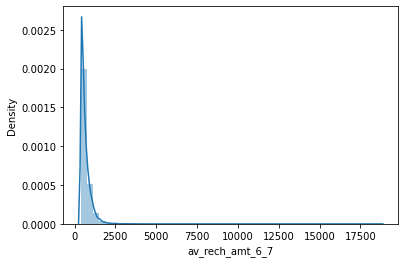

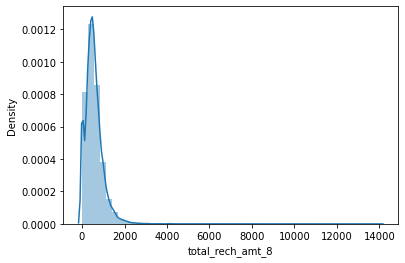

In [46]:
# Plot the dsitribution plot for total_rech_amt_diff 

dist_plot(master_df['av_rech_amt_6_7'])
dist_plot(master_df['total_rech_amt_8'])


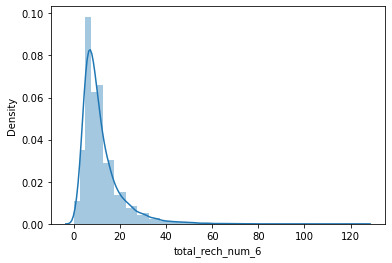

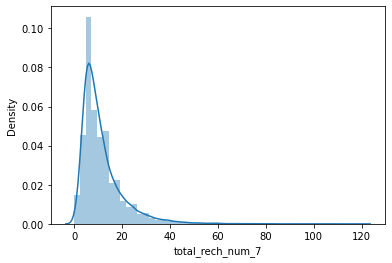

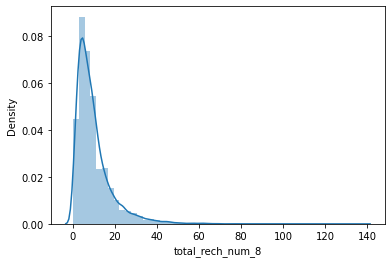

In [47]:
# Plot the distribution plot for total_rech_num_diff 

dist_plot(master_df['total_rech_num_6'])
dist_plot(master_df['total_rech_num_7'])
dist_plot(master_df['total_rech_num_8'])

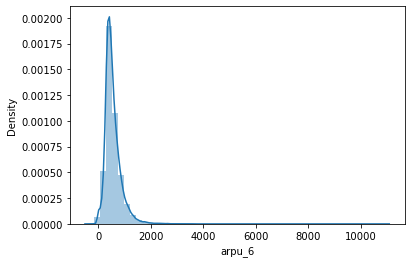

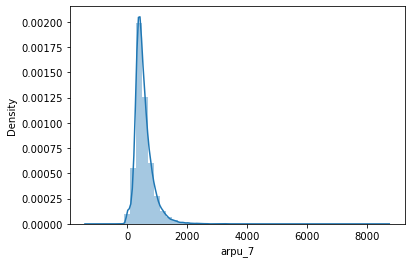

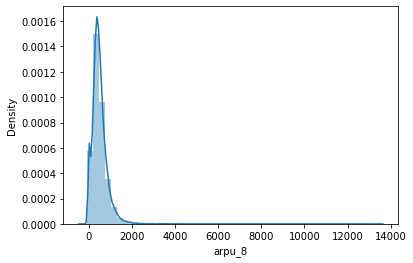

In [48]:
#lets look at distributiomm of arpu_*

dist_plot(master_df['arpu_6'])
dist_plot(master_df['arpu_7'])
dist_plot(master_df['arpu_8'])

No specific observation so far.

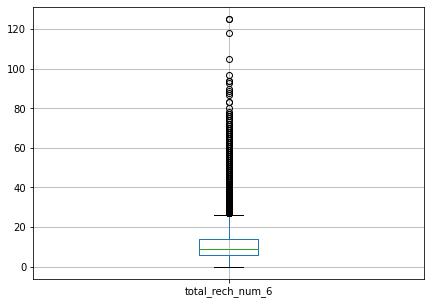

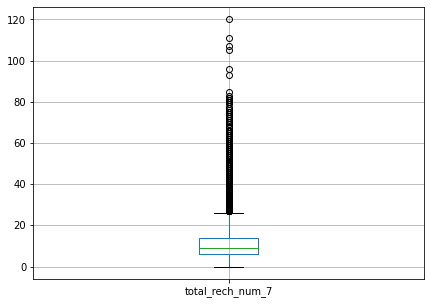

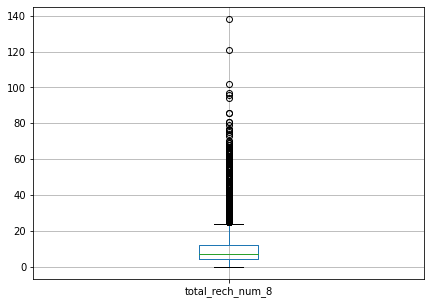

In [49]:
box_plot('total_rech_num_6', master_df)
box_plot('total_rech_num_7', master_df)
box_plot('total_rech_num_8', master_df)

This brings us to the end of Data cleaning. Next we will be preparing data by deriving some meaningful columns, create churn data and do some more data visualization. 

## 3. Data Preparation

First, ,we will create churn data from the 9th month data - (churn=1, else 0)
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

The attributes we are going to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [50]:
#Define function to tag churn

def churn_funct(row):
    if ((row['total_ic_mou_9'] == 0) & (row['total_og_mou_9'] == 0) & (row['vol_2g_mb_9'] == 0) & (row['vol_3g_mb_9'] == 0)):
        return(1)
    else:
        return(0)
                

In [51]:
#Tag churn or not (churn=1, else 0)

master_df['churn'] = master_df.apply(churn_funct, axis = 1)

In [52]:
master_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','churn']].head(20)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
1,34.91,142.18,0.00,0.00,0
2,334.56,255.74,0.00,0.00,0
3,87.13,631.08,0.00,0.00,0
4,252.61,1031.53,0.00,0.00,0
5,330.03,627.78,0.00,0.00,0
6,114.16,1.70,30.92,5588.11,0
7,114.09,708.04,0.00,0.00,0
8,165.84,89.13,0.00,0.00,0
9,894.81,2319.01,0.00,0.00,0


In [53]:
master_df['churn'].value_counts()

0    24393
1     2291
Name: churn, dtype: int64

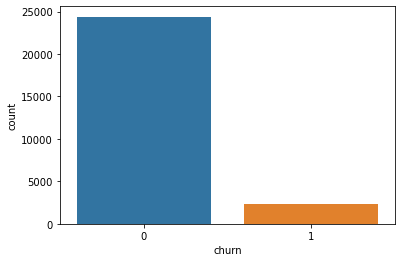

In [54]:
#countplot for churn

sns.countplot(master_df['churn'])
plt.show()

Class imbalance seen here, very less number of churn compared to non-churn

In [55]:
#Next, we will drop all columns in the master_df which belong to the 4th month - most contain _9 and some contain 'sep' word

cols_list_3 = [col for col in master_df.columns if ('_9' in col) or ('sep' in col)]
cols_list_3                                

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g',
 'day_of_last_rech_data_9',
 'day_of_last_rech_9']

In [56]:
#number of columns to be dropped
len(cols_list_3)

40

In [57]:
#Dropping columns for the churn month

drop_funct(cols_list_3)

In [58]:
#Shape of master_df after dropping columns
master_df.shape

(26684, 122)

Next, we will derive some new columns showing the difference in the 'good' and the 'action' phases. Months _6 and _7 are 'good' phase and '_8' is 'action' phase.

In [59]:

master_df['arpu_diff'] = round((master_df['arpu_8'] - (master_df['arpu_6'] + master_df['arpu_7'])/2) ,2) 

master_df['onnet_mou_diff'] = round((master_df['onnet_mou_8'] - (master_df['onnet_mou_6'] + master_df['onnet_mou_7'])/2), 2)
master_df['offnet_mou_diff'] = round((master_df['offnet_mou_8'] - (master_df['offnet_mou_6'] + master_df['offnet_mou_7'])/2), 2)

master_df['roam_ic_mou_diff'] = round((master_df['roam_ic_mou_8'] - (master_df['roam_ic_mou_6'] + master_df['roam_ic_mou_7'])/2), 2)
master_df['roam_og_mou_diff'] = round((master_df['roam_og_mou_8'] - (master_df['roam_og_mou_6'] + master_df['roam_og_mou_7'])/2), 2)

master_df['loc_og_t2c_mou_diff'] = round((master_df['loc_og_t2c_mou_8'] - (master_df['loc_og_t2c_mou_6'] + master_df['loc_og_t2c_mou_7'])/2), 2)

master_df['loc_og_mou_diff'] = round((master_df['loc_og_mou_8'] - (master_df['loc_og_mou_6'] + master_df['loc_og_mou_7'])/2), 2)
master_df['std_og_mou_diff'] = round((master_df['std_og_mou_8'] - (master_df['std_og_mou_6'] + master_df['std_og_mou_7'])/2), 2)


master_df['total_og_mou_diff'] = round((master_df['total_og_mou_8'] - (master_df['total_og_mou_6'] + master_df['total_og_mou_7'])/2), 2)
master_df['total_ic_mou_diff'] = round((master_df['total_ic_mou_8'] - (master_df['total_ic_mou_6'] + master_df['total_ic_mou_7'])/2), 2)

master_df['total_rech_num_diff'] = round((master_df['total_rech_num_8'] - (master_df['total_rech_num_6'] + master_df['total_rech_num_7'])/2), 2)
master_df['total_rech_amt_diff'] = master_df['total_rech_amt_8'] - master_df['av_rech_amt_6_7']

master_df['total_rech_data_diff'] = round((master_df['total_rech_data_8'] - (master_df['total_rech_data_6'] + master_df['total_rech_data_7'])/2), 2)

master_df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_6_7,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,total_rech_data_diff
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.00,0.0,0.00,422.16,533.91,255.79,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1185.0,0,0,0,27,25,26,1,1961.96,-3.97,-184.38,6.78,19.90,0.00,-222.24,9.84,-198.22,-163.51,2.0,2453.0,0.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.0,750.95,11.94,0.0,0.00,19.83,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,519.0,0,31,23,25,31,30,0,-298.11,-347.28,48.83,0.00,0.00,7.15,-270.09,-38.59,-298.45,-49.64,-6.0,-399.0,2.0
2,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.00,0.0,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.00,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,276.86,229.83,211.78,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,511,0.00,2.45,21.89,459.0,0,0,0,30,31,14,0,-177.53,8.35,-100.26,-1.42,-8.87,0.00,-59.84,-27.46,-83.03,-78.75,-6.0,-299.0,0.0
3,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13

In [60]:
#Lets see correlation between the new columns created

#creating list of new columns

cols_list_5 = [col for col in master_df.columns if ('_diff' in col)]
cols_list_5

['arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'loc_og_t2c_mou_diff',
 'loc_og_mou_diff',
 'std_og_mou_diff',
 'total_og_mou_diff',
 'total_ic_mou_diff',
 'total_rech_num_diff',
 'total_rech_amt_diff',
 'total_rech_data_diff']

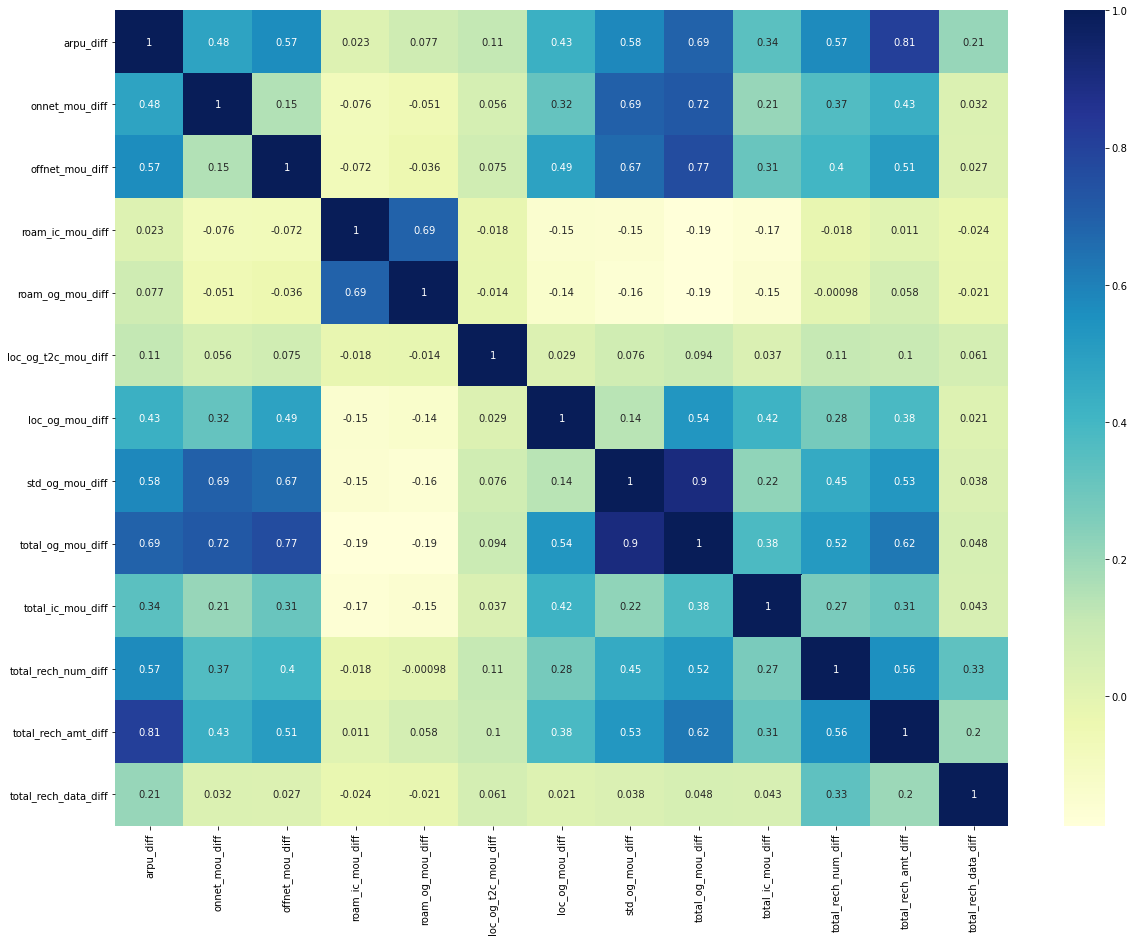

In [61]:
#Lets try a heatmap

# Heatmap to show the correlation of variables

plt.figure(figsize=(20,15))
sns.heatmap(master_df[cols_list_5].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [62]:
#creating list of mou_, rech_num, rech_data type of columns

cols_list_6 = [col for col in master_df.columns if ('ic_amt' in col) or ('ic_mou' in col)]
cols_list_6

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'roam_ic_mou_diff',
 'total_ic_mou_diff']

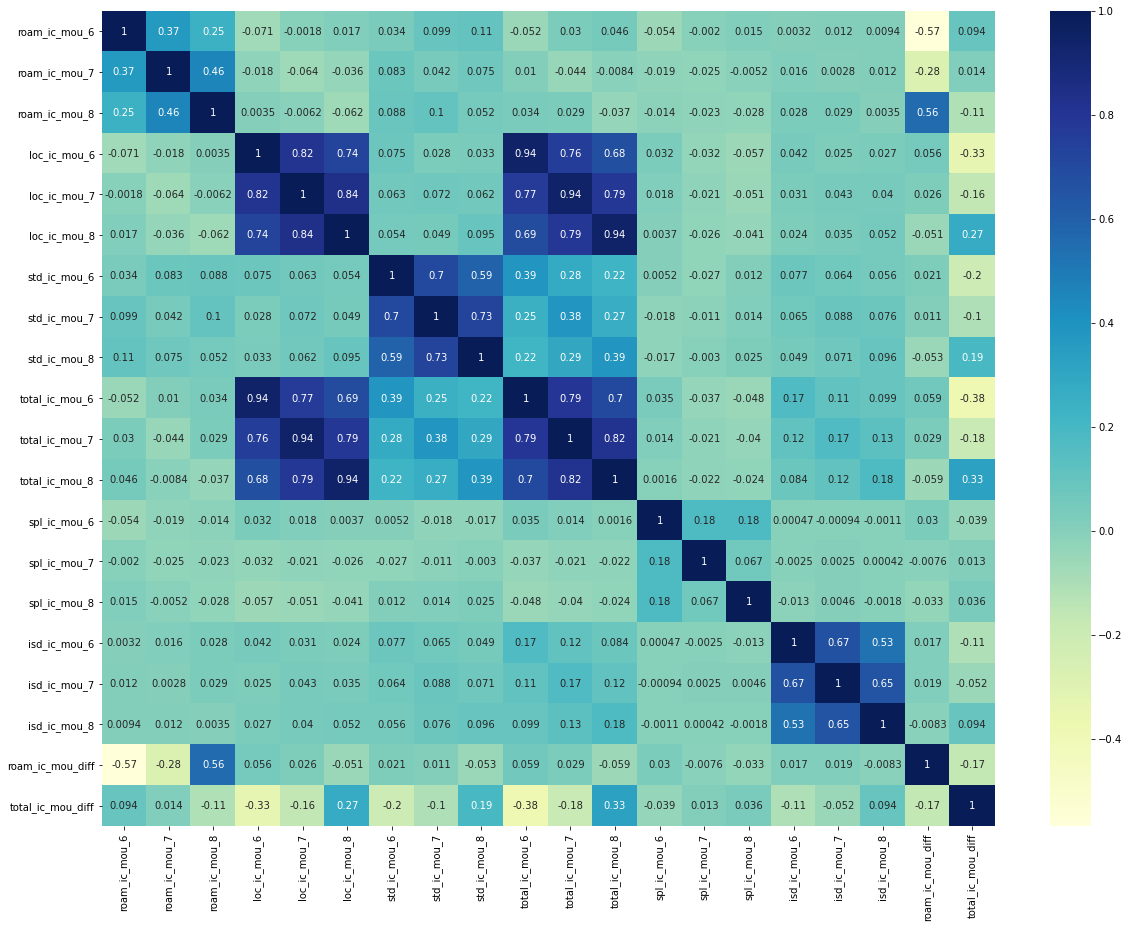

In [63]:
# Heatmap to show the correlation of variables

plt.figure(figsize=(20,15))
sns.heatmap(master_df[cols_list_6].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [64]:
#creating list of mou_, rech_num, rech_data type of columns

cols_list_7 = [col for col in master_df.columns if ('og_amt' in col) or ('og_mou' in col)]
cols_list_7

['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'roam_og_mou_diff',
 'loc_og_mou_diff',
 'std_og_mou_diff',
 'total_og_mou_diff']

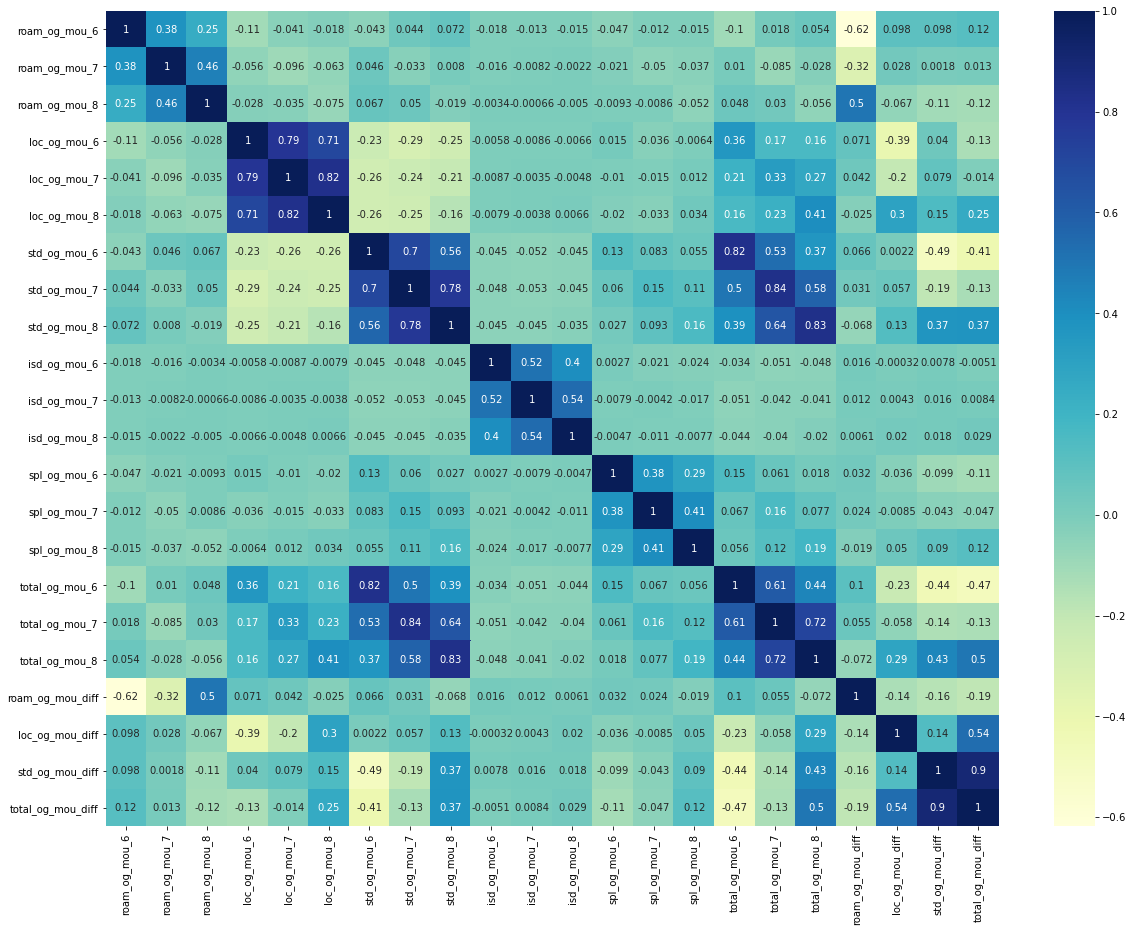

In [65]:
# Heatmap to show the correlation of variables

plt.figure(figsize=(20,15))
sns.heatmap(master_df[cols_list_7].corr(), annot=True, cmap='YlGnBu')
plt.show()

All above heatmaps show high correlation between some of the variables. But we will not be handling them now.
We will rely on PCA to take care of it. 
We will proceed with PCA next. 

In [66]:
master_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'roam_ic_mou_diff', 'roam_og_mou_diff', 'loc_og_t2c_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'total_og_mou_diff',
       'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
       'total_rech_data_diff'],
      dtype='object', length=135)


## Model Building for prediction

Let's start by splitting our data into a training set and a test set.


In [67]:

# Putting feature variable to X
X = master_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = master_df['churn']



In [68]:
# normalisation function 

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          


In [69]:
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_6_7,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,total_rech_data_diff
0,0.128123,0.266645,0.253886,0.017283,0.018289,0.018168,0.134982,0.171293,0.112252,0.02213,0.054377,0.058946,0.024439,0.017611,0.061120,0.0,0.0,0.000000,0.166214,0.231844,0.125913,0.018681,0.024611,0.026753,0.0,0.001362,0.09197,0.036711,0.000000,0.060561,0.000000,0.0,0.0,0.104960,0.123641,0.089567,0.173395,0.164540,0.094848,0.137295,0.164013,0.216357,0.214185,0.206361,0.178288,0.253012,0.0,0.0,0.002973,0.030592,0.070331,0.27054,0.281401,0.347009,0.040,0.041667,0.050725,0.259857,0.471642,0.239467,0.355136,0.000000,0.000000,0.175096,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.005955,0.003599,0.005363,0.003022,0.003208,0.006997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150205,0.004470,0.002114,0.002472,0.044420,0.0,0.0,0.000000,0.900000,0.806452,0.838710,0.768782,0.519335,0.505200,0.518565,0.564874,0.439488,0.494735,0.517882,0.491562,0.548021,0.602076,0.833295,0.367470
1,0.067229,0.180009,0.034834,0.123616,0.117409,0.012188,0.028179,0.024352,0.047007,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.144037,0.148863,0.125139,0.031031,0.039984,0.046995,0.033778,0.0,0.000000,0.00000,0.000000,0.000000,0.095314,0.000000,0.0,0.0,0.109444,0.087602,0.043883,0.032999,0.011038,0.007965,0.017057,0.004416,0.000837,0.035509,0.010536,0.006878,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.152,0.175000,0.101449,0.008571,0.026866,0.046681,0.006743,0.014925,0.000000,0.002248,0.0,0.037037,0.05,0.0,0.099035,0.014791,0.0,0.041667,0.068182,0.0,0.0,0.0,0.0,0.04055,0.016991,0.0,0.045215,0.000003,0.0,0.026682,0.000398,0.005955,0.003599,0.010669,0.003022,0.003208,0.006997,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.020833,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.032601,0.001628,0.099355,0.016113,0.008188,0.0,1.0,0.741935,0.833333,1.000000,0.967742,0.472166,0.447764,0.552308,0.512354,0.550435,0.520435,0.482080,0.509403,0.474684,0.582176,0.546713,0.503355,0.391566
2,0.071838,0.160577,0.038482,0.015093,0.024754,0.024533,0.088203

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, train_size=0.7,test_size=0.3,random_state=100)

In [71]:
X_train.shape

(18678, 133)

In [72]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (18678, 133)
Shape of y_train (18678,)
Shape of X_test (8006, 133)
Shape of y_test (8006,)


### Applying PCA 

In [73]:
pca = PCA(random_state=42)

In [74]:
pca.fit(X_train)

PCA(random_state=42)

In [75]:
pca.components_

array([[ 3.63101485e-03,  5.14973183e-03,  4.76801959e-03, ...,
         1.71233370e-03,  3.84377789e-03, -5.81477452e-04],
       [ 8.83788999e-03,  2.77493159e-02,  2.91711066e-02, ...,
         3.03716285e-02,  3.24301589e-02,  2.08208746e-02],
       [ 1.18014443e-02,  1.07547427e-02, -2.09079003e-03, ...,
        -1.69354604e-02, -1.79048516e-02, -1.66861751e-02],
       ...,
       [-0.00000000e+00,  8.22955599e-17, -3.31021324e-16, ...,
         2.90118843e-02,  5.97588647e-02, -7.98751738e-02],
       [-0.00000000e+00, -5.28246642e-17,  6.71488158e-16, ...,
         1.58358277e-02,  6.29858100e-02, -6.49248698e-02],
       [ 0.00000000e+00, -2.68929535e-16,  3.77507060e-16, ...,
         4.46721318e-02,  4.64784171e-02,  3.31326981e-01]])

In [76]:
pca.explained_variance_ratio_

array([4.16756356e-01, 6.93129407e-02, 6.12892603e-02, 5.11413709e-02,
       4.69574714e-02, 3.26057490e-02, 2.62570472e-02, 2.41759312e-02,
       1.88452094e-02, 1.76296846e-02, 1.61701184e-02, 1.55064158e-02,
       1.37861572e-02, 1.17594506e-02, 1.14829478e-02, 1.00167598e-02,
       9.20355829e-03, 8.65300203e-03, 8.27949726e-03, 7.92556885e-03,
       7.24450110e-03, 6.73329988e-03, 6.46344606e-03, 5.97636611e-03,
       5.60997383e-03, 5.42676432e-03, 4.75945292e-03, 4.48134334e-03,
       4.35956124e-03, 3.94124147e-03, 3.68657399e-03, 3.60354094e-03,
       3.47755714e-03, 3.08084781e-03, 2.73175736e-03, 2.64397968e-03,
       2.55472556e-03, 2.34717445e-03, 2.24564221e-03, 2.10920624e-03,
       2.02800274e-03, 1.95464386e-03, 1.71742439e-03, 1.62543655e-03,
       1.52918028e-03, 1.51075584e-03, 1.42560263e-03, 1.41901445e-03,
       1.34117079e-03, 1.31816295e-03, 1.25074161e-03, 1.22689833e-03,
       1.16267416e-03, 1.12781132e-03, 1.11386681e-03, 1.08008927e-03,
      

Making a scree plot for the explained variance

In [77]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

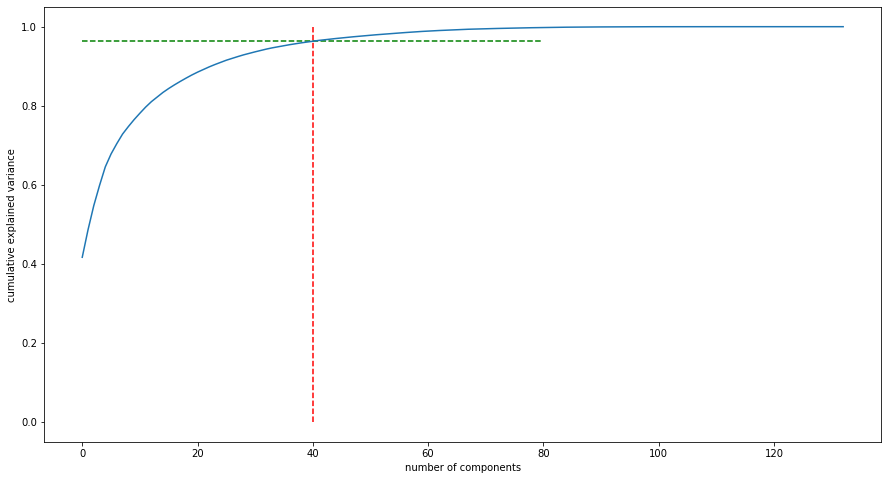

In [78]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.965, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### As we can see 40 component explain 97% of variance in the data

In [79]:
pca_final = IncrementalPCA(n_components=40)

In [80]:
df_train_pca = pca_final.fit_transform(X_train)

In [81]:
df_train_pca.shape

(18678, 40)

In [82]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [83]:
corrmat.shape

(40, 40)

<AxesSubplot:>

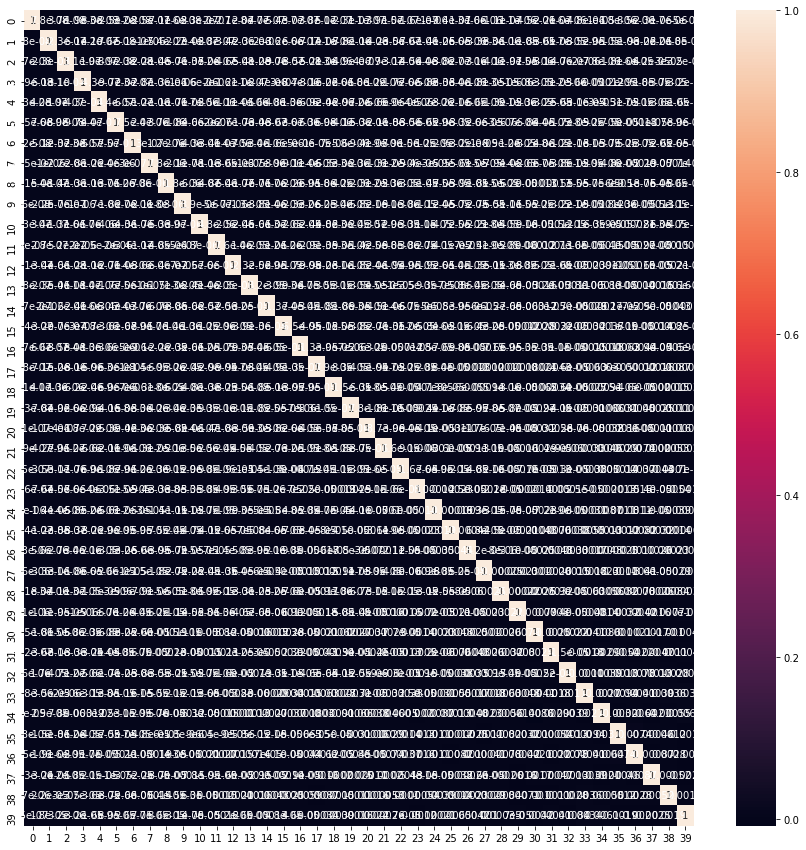

In [84]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [85]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8006, 40)

### LogistcRegression model with PCA 

In [86]:
#Creating instance of LoggisticRegression
#"class_weight='balanced' " will handle class-imbalance in the data by penalizing the mis-classification of minority class more

learner_pca = LogisticRegression(class_weight='balanced')

In [87]:
#fitting training data 

model_pca = learner_pca.fit(df_train_pca, y_train)

In [88]:
#Making predictions on the test set

pred_probs_test = model_pca.predict_proba(df_test_pca)

In [89]:
#roc_auc_score

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [90]:
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_test = model_pca.predict(df_test_pca)

In [91]:
#lets look at the confusion matrix

print(confusion_matrix(y_test,y_pred_test))


[[5997 1297]
 [ 120  592]]


In [92]:
print(accuracy_score(y_test,y_pred_test))

0.8230077441918561


In [93]:
# Converting to column dataframe

y_pred_df = pd.DataFrame(pred_test)
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)



In [94]:
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [95]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8896857660444325


#### ROC Curve

In [96]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate ')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

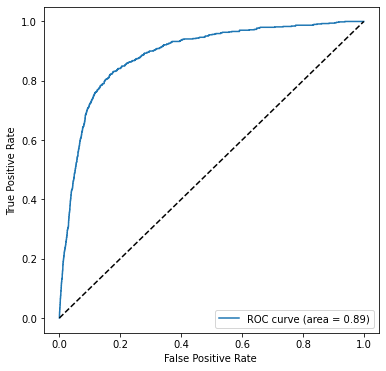

(array([0.       , 0.       , 0.       , ..., 0.9997258, 0.9998629,
        1.       ]),
 array([0.        , 0.00140449, 0.00280899, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99907945e+00, 9.99079451e-01, 9.98324364e-01, ...,
        2.75161907e-05, 2.30273575e-05, 1.31010239e-05]))

In [97]:
plot_roc(y_pred_final.churn, y_pred_final.churn_prob)

Defining columns with different probability cutoffs 

In [98]:
def column_with_diff_prob(y_final):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_final[i]= y_final.churn_prob.map( lambda x: 1 if x > i else 0)
    return y_final

In [99]:
y_pred_final = column_with_diff_prob(y_pred_final)

In [100]:
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.427280,1,1,1,1,1,0,0,0,0,0
1,0,0.000201,1,0,0,0,0,0,0,0,0,0
2,0,0.146383,1,1,0,0,0,0,0,0,0,0
3,0,0.266120,1,1,1,0,0,0,0,0,0,0
4,0,0.087639,1,0,0,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

def plot_cutoff_various_prob(y_p_f):
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix( y_p_f.churn, y_p_f[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
   
        

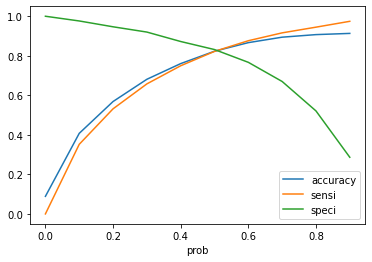

In [102]:
plot_cutoff_various_prob(y_pred_final)


In [103]:

def optimalCutoff(target, predicted):
    """
        Find the optimal probability cutoff point for a classification model related to event rate
        Parameters
        target : Matrix with dependent or target data, where rows are observations

        predicted : Matrix with predicted data, where rows are observations

        Returns
        list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])



In [104]:
# Find optimal probability threshold
threshold = optimalCutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',optimalCutoff(y_pred_final.churn,y_pred_final.churn_prob))

Threshold:  [0.5065329304878534]


In [105]:
#Creating new  'predicted' column with 1 if Churn_Prob>0.50 else 0

In [106]:
y_pred_final['churn_pred'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)


In [107]:
def conf_matrix(y_test,y_pred):
    return metrics.confusion_matrix(y_test, y_pred )
    

In [108]:
def model_perf(y_test,y_pred,confusion):
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Accuracy 
    print('Accuracy Score : ',accuracy_score(y_test,y_pred))

    # sensitivity 
    print('Sensitivity: ', TP / float(TP+FN))

    # specificity
    print('Specificity: ',TN / float(TN+FP))
    
    # confusionMatrix
    print('confusion: ',confusion)

In [109]:
confusion = conf_matrix(y_pred_final.churn,y_pred_final.churn_pred)
print(confusion)

[[5997 1297]
 [ 120  592]]


In [110]:
model_perf(y_test,y_pred_test,confusion)

Accuracy Score :  0.8230077441918561
Sensitivity:  0.8314606741573034
Specificity:  0.8221826158486427
confusion:  [[5997 1297]
 [ 120  592]]


#### LogistcRegression model with PCA Result
- Accuracy Score :  0.8230077441918561
- Sensitivity:  0.8314606741573034
- Specificity:  0.8221826158486427

### DecisionTreeClassifier With PCA

In [111]:
#importing some necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
# Decision tree with default hyperparameters max_depth = 5 and class_weight='balanced'

dt_base = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_base.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [113]:
#predicting

y_train_pred = dt_base.predict(df_train_pca)
y_test_pred = dt_base.predict(df_test_pca)

In [114]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7294
           1       0.30      0.75      0.43       712

    accuracy                           0.82      8006
   macro avg       0.63      0.79      0.66      8006
weighted avg       0.91      0.82      0.85      8006



In [115]:
confusion = conf_matrix(y_test,y_test_pred)
print(confusion)

[[6019 1275]
 [ 175  537]]


In [116]:
model_perf(y_test,y_test_pred,confusion)

Accuracy Score :  0.8188858356232825
Sensitivity:  0.7542134831460674
Specificity:  0.8251987935289279
confusion:  [[6019 1275]
 [ 175  537]]


In [117]:
from sklearn.metrics import plot_roc_curve

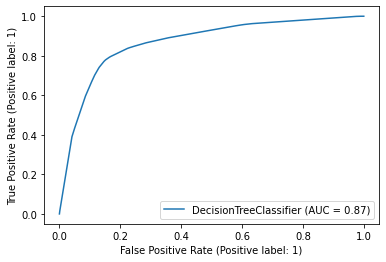

In [118]:
plot_roc_curve(dt_base, df_train_pca, y_train, drop_intermediate=False)
plt.show()

## Hyperparameter tuning ( Decision Tree )

In [119]:
params = {
    "max_depth": [5,10,20],
    "min_samples_leaf": [20,50,100],
    "min_samples_split": [5,10,20],
    'criterion': ["entropy", "gini"]
}

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
grid_search = GridSearchCV(dtree, params, 
                    cv=n_folds, 
                   scoring="accuracy")
grid_search.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [20, 50, 100],
                         'min_samples_split': [5, 10, 20]},
             scoring='accuracy')

In [121]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.648111,0.031713,0.001391,0.000495,entropy,5,20,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.763919,0.824143,0.827088,0.763855,0.757697,0.787341,0.031347,34
1,0.585670,0.014398,0.001398,0.000492,entropy,5,20,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.763919,0.824143,0.827088,0.763855,0.757697,0.787341,0.031347,34
2,0.605440,0.021655,0.001596,0.000488,entropy,5,20,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.763919,0.824143,0.827088,0.763855,0.757697,0.787341,0.031347,34
3,0.563243,0.026901,0.001395,0.000490,entropy,5,50,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764722,0.820396,0.826552,0.765730,0.756627,0.786805,0.030169,37
4,0.542238,0.015276,0.001205,0.000394,entropy,5,50,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764722,0.820396,0.826552,0.765730,0.756627,0.786805,0.030169,37


In [122]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,1.013697,0.049496,0.001796,0.000399,entropy,20,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.809154,0.829497,0.808887,0.806961,0.824096,0.815719,0.009236,1
19,1.039891,0.045943,0.001900,0.000198,entropy,20,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.809154,0.829497,0.808887,0.806961,0.824096,0.815719,0.009236,1
20,0.911279,0.046308,0.001595,0.000489,entropy,20,20,20,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.809154,0.829497,0.808887,0.806961,0.824096,0.815719,0.009236,1
9,0.847478,0.022437,0.001397,0.000488,entropy,10,20,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.797912,0.805675,0.807816,0.792503,0.820616,0.804904,0.009577,4
10,0.885318,0.035058,0.001795,0.000399,entropy,10,20,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.797912,0.805675,0.807816,0.792503,0.820616,0.804904,0.009577,4


In [123]:
grid_search.best_score_

0.8157190073642179

In [124]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=20, min_samples_split=5,
                       random_state=100)

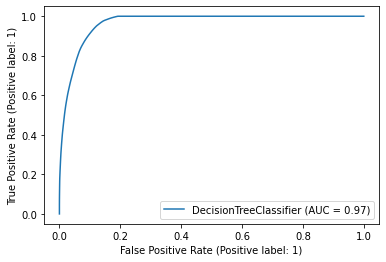

In [125]:
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

In [126]:
def evaluate_tree_model(dt_classifier):
    
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    
    print("-"*50)
    
    y_pred_default = dt_classifier.predict(df_test_pca)
    
    print("Test Accuracy :", accuracy_score(y_test, y_pred_default))
    print("Test Confusion Matrix:")
    confusion_tree_hyper=confusion_matrix(y_test, y_pred_default)
    print(confusion_tree_hyper)
    
    TP = confusion_tree_hyper[1,1] # true positive 
    TN = confusion_tree_hyper[0,0] # true negatives
    FP = confusion_tree_hyper[0,1] # false positives
    FN = confusion_tree_hyper[1,0] # false negatives
    
    print('Sensitivity: ', TP / float(TP+FN))

    # Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))
    print(confusion_tree_hyper)
    # Let's see the sensitivity of our logistic regression model
    
    

In [127]:
evaluate_tree_model(dt_best)

Train Accuracy : 0.8673840882321447
Train Confusion Matrix:
--------------------------------------------------
Test Accuracy : 0.8120159880089932
Test Confusion Matrix:
[[6038 1256]
 [ 249  463]]
Sensitivity:  0.6502808988764045
Specificity:  0.8278036742528105
[[6038 1256]
 [ 249  463]]


In [128]:
from sklearn.metrics import classification_report

In [129]:
y_pred_best = dt_best.predict(df_test_pca)

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7294
           1       0.27      0.65      0.38       712

    accuracy                           0.81      8006
   macro avg       0.61      0.74      0.64      8006
weighted avg       0.90      0.81      0.84      8006



#### Decision Tree model with PCA Result:
- Accuracy Score :  0.87
- Sensitivity:  0.50
- Specificity:  0.90

### RandomForestClassifier with PCA

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier( random_state=100, oob_score=True,n_estimators=10, max_depth=4, max_features=5, class_weight='balanced')
rf.fit(df_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [132]:
rf.oob_score_

0.7904486561730378

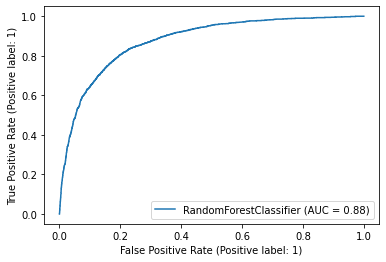

In [133]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

In [134]:
evaluate_tree_model(rf)

Train Accuracy : 0.8307099261162866
Train Confusion Matrix:
--------------------------------------------------
Test Accuracy : 0.8226330252310767
Test Confusion Matrix:
[[6073 1221]
 [ 199  513]]
Sensitivity:  0.7205056179775281
Specificity:  0.8326021387441733
[[6073 1221]
 [ 199  513]]


## Hyperparameter tuning for RandomForest


In [135]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [136]:
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [137]:
n_folds = 5
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = n_folds,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [138]:
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [139]:
grid_search.best_score_

0.9248313167014954

In [140]:
#best predictor selected
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_jobs=-1)

In [141]:
rf_best.feature_importances_

array([0.05966773, 0.07709876, 0.06844646, 0.07182193, 0.03648013,
       0.02300443, 0.02652862, 0.12604491, 0.01720883, 0.01652613,
       0.01719377, 0.01717213, 0.02027738, 0.01736256, 0.01401933,
       0.01665199, 0.02559885, 0.01968825, 0.0126317 , 0.01228152,
       0.01979493, 0.01507963, 0.01480451, 0.01659777, 0.02373556,
       0.01499781, 0.01677251, 0.0112559 , 0.0110392 , 0.01309802,
       0.01077659, 0.01179138, 0.02504093, 0.01297771, 0.01265753,
       0.0168872 , 0.01716615, 0.01439399, 0.01267628, 0.01275098])

In [142]:
evaluate_tree_model(rf_best)

Train Accuracy : 0.9840989399293286
Train Confusion Matrix:
--------------------------------------------------
Test Accuracy : 0.91668748438671
Test Confusion Matrix:
[[7037  257]
 [ 410  302]]
Sensitivity:  0.4241573033707865
Specificity:  0.9647655607348505
[[7037  257]
 [ 410  302]]


In [143]:
from imblearn.metrics import sensitivity_specificity_support

In [144]:
# predict churn on test data
y_pred = rf_best.predict(df_test_pca)

# create onfusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)


[[7037  257]
 [ 410  302]]
Sensitivity:  0.4241573033707865
Specificity:  0.9647655607348505


#### RandomForest model with PCA Result:
- Accuracy Score :  0.917
- Sensitivity:  0.44
- Specificity:  0.96

### Recomendation for Model 

- LogisticRegression is the best model 83% Sensitivity. As sensitivity is important in this case, we choose this model for prediction. 
- Random Forest performed better than Decision Tree & LogisticRegression for customer churn analysis for this   particular dataset, using PCA.
- Accuracy of RandomForest is highest with 92%

#### LogisticRegression with PCA on Test Data
- Accuracy Score : 0.82
- Sensitivity: 0.83

#### RandomForest with PCA on Test Data
- Accuracy Score : 0.917
- Sensitivity: 0.44

#### DecisionTree with PCA on Test Data
- Accuracy Score : 0.87
- Sensitivity: 0.50


## Feature importance

We will take the training and test dataset, that we got before pca, as it has all the features present. 

We will be building random forest in order to get the important features

In [145]:
#Building randomforest to get feature_importance

rf = RandomForestClassifier(n_estimators=100, max_features = "auto",  
                                  oob_score=True, random_state=4, verbose=1, class_weight='balanced')

In [146]:
#fitting the model

rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished


RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=4,
                       verbose=1)

In [147]:
# OOB score
rf.oob_score_

0.9393939393939394

In [148]:
#predicting churn on test data
y_pred = rf.predict(X_test)

#creating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[7213   81]
 [ 401  311]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [149]:
#calculating sensitivity and specificity

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred)

print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  [0.98889498 0.43679775]
Specificity:  [0.43679775 0.98889498]


In [150]:
feature_imp = rf.feature_importances_

In [151]:
#Creating dataframe with featires and their importance

feature_name = X_train.columns

imp_df = pd.DataFrame({'Features': feature_name, 'Importance%': feature_imp*100})
imp_df.head()

,Features,Importance%
0,arpu_6,0.773030
1,arpu_7,0.759297
2,arpu_8,3.598263
3,onnet_mou_6,0.655709
4,onnet_mou_7,0.569353


In [152]:
#sorting features based on importance

imp_df.sort_values(by=['Importance%'], ascending= False, inplace=True)
imp_df.head(30)

,Features,Importance%
57,total_rech_amt_8,6.086867
44,total_ic_mou_8,5.223573
131,total_rech_amt_diff,5.066091
63,last_day_rch_amt_8,4.390605
120,arpu_diff,3.648376
35,total_og_mou_8,3.631792
2,arpu_8,3.598263
38,loc_ic_mou_8,2.963797
128,total_og_mou_diff,2.915977
14,roam_og_mou_8,2.770618


In [153]:
#Taking top 30 features and building LR model

cols_list = list(imp_df['Features'][:30])
cols_list

['total_rech_amt_8',
 'total_ic_mou_8',
 'total_rech_amt_diff',
 'last_day_rch_amt_8',
 'arpu_diff',
 'total_og_mou_8',
 'arpu_8',
 'loc_ic_mou_8',
 'total_og_mou_diff',
 'roam_og_mou_8',
 'max_rech_amt_8',
 'loc_og_mou_8',
 'day_of_last_rech_8',
 'roam_ic_mou_8',
 'total_ic_mou_diff',
 'roam_og_mou_diff',
 'offnet_mou_8',
 'total_rech_num_diff',
 'roam_ic_mou_diff',
 'std_og_mou_diff',
 'onnet_mou_diff',
 'av_rech_amt_data_8',
 'total_rech_num_8',
 'aon',
 'std_ic_mou_8',
 'loc_og_mou_7',
 'offnet_mou_diff',
 'onnet_mou_8',
 'total_ic_mou_7',
 'total_og_mou_7']

In [154]:
#taking above columns only

X_train_new = X_train[cols_list]
X_train_new.shape

(18678, 30)

In [155]:
#Fitting logistic classifier
logm1 = LogisticRegression(class_weight='balanced')
model_logm1 = logm1.fit(X_train_new, y_train)

In [156]:
#taking X_train_new columns only for X_test

X_test_new = X_test[cols_list]
X_test_new.shape

(8006, 30)

In [157]:
#predicting on test data
pred_probs_test = model_logm1.predict_proba(X_test_new)
y_pred_test = model_logm1.predict(X_test_new)

In [158]:
print(confusion_matrix(y_test,y_pred_test))

[[6128 1166]
 [ 117  595]]


In [159]:
print(accuracy_score(y_test,y_pred_test))

0.83974519110667


In [160]:
#calculating sensitivity and specificity

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred)

print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  [0.98889498 0.43679775]
Specificity:  [0.43679775 0.98889498]


In [161]:
#checking coefficients of the logistic regression model
logm1.coef_

array([[ 0.89792663, -8.12024123, -3.96800961, -6.730939  , -1.48431993,
        -9.45268435,  0.99431003,  1.22398706, -3.78906321,  1.78093723,
         2.27720426, -2.45992182, -2.25899437,  0.27921089, -4.67287501,
        -1.72477718,  5.60087794, -2.83177391, -0.21308999, -1.37361775,
         0.46154318, -8.19948206, -0.71919679, -1.63107249,  0.3740367 ,
        -1.49288257,  1.88024984,  5.60296261,  0.5042836 ,  1.38379379]])

In [162]:
#converting into a list

arr = logm1.coef_[0]
coeff_list = arr.tolist()
coeff_list

[0.8979266338746238,
 -8.120241226278221,
 -3.9680096132150746,
 -6.730939001001688,
 -1.484319927456919,
 -9.452684349285219,
 0.9943100273054714,
 1.2239870563790018,
 -3.7890632066289087,
 1.7809372294644754,
 2.277204259330001,
 -2.4599218207535283,
 -2.258994374445798,
 0.2792108906387553,
 -4.67287501298237,
 -1.724777179056011,
 5.600877943396202,
 -2.831773905118275,
 -0.2130899940063108,
 -1.3736177513141898,
 0.46154317555344143,
 -8.199482055870687,
 -0.71919678993765,
 -1.6310724861097239,
 0.37403669960823105,
 -1.4928825672832333,
 1.8802498446249207,
 5.602962607433519,
 0.5042836008767693,
 1.3837937856676177]

In [163]:
#Creating dataframe with featires and their importance

feature_name = X_train_new.columns

coeff_df = pd.DataFrame({'Features': feature_name, 'Coeffiecient': coeff_list})
coeff_df.head(30)

,Features,Coeffiecient
0,total_rech_amt_8,0.897927
1,total_ic_mou_8,-8.120241
2,total_rech_amt_diff,-3.968010
3,last_day_rch_amt_8,-6.730939
4,arpu_diff,-1.484320
5,total_og_mou_8,-9.452684
6,arpu_8,0.994310
7,loc_ic_mou_8,1.223987
8,total_og_mou_diff,-3.789063
9,roam_og_mou_8,1.780937


In [164]:
#Merginf feature importance from randomforest and coefficients from logistic regression, to give us better picture of important predictors

newdf = coeff_df.merge(imp_df,how='left',on=['Features'])
newdf

,Features,Coeffiecient,Importance%
0,total_rech_amt_8,0.897927,6.086867
1,total_ic_mou_8,-8.120241,5.223573
2,total_rech_amt_diff,-3.968010,5.066091
3,last_day_rch_amt_8,-6.730939,4.390605
4,arpu_diff,-1.484320,3.648376
5,total_og_mou_8,-9.452684,3.631792
6,arpu_8,0.994310,3.598263
7,loc_ic_mou_8,1.223987,2.963797
8,total_og_mou_diff,-3.789063,2.915977
9,roam_og_mou_8,1.780937,2.770618


### Strategies recommended to manage customer churn based on the obserbvation:

Observation 1: 'total_ic_mou_8' and 'total_og_mou_8' seem to be strong indicators of churn, with high negative coefficient and high importance percentage. 
Recommendation: The incoming and outgoing minutes of usage for the 'action' phase is a strong indicator of churn. This can be monitored, and timely action can be taken if needed.

Observation 2: 'arpu_diff' is another good indicator of churn, with negative coefficient and high importance percentage. It is a derived column that gives percentage rise in the average revenue of good phase and action phase.
Recommendation: If average revenue of the customer goes down, the customer can be contacted and offered some good discount/offer to avoid churn. 

Observation: 'roam_og_mou_diff' is also a strong indicator of churn, with positive coefficient. It is a derived column showing percentage rise in the roaming outgoing minutes of usage. 
Recommendation: Users who take up roaming facility, can be contacted for a survey to figure out if the roaming charges are high compared to the competitor network providers. 

Observation 4: 'av_rech_amt_data_8' has a very high negative coefficient and significant percentage of importance.
Recommendation: Business can check the market average for data charges and come up with some attractive plans. 

### This marks the end of the notebook